# CONTOUR MASKING

using [hull of] biggest contour

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## WORK IN PROGRESS
# CLOSES MAX CONTOUR TO USE IT AS A MASK
def closeCnt(image2close):
    kernel = np.ones((25,25),np.uint8)#cv.getStructuringElement(cv.MORPH_RECT,(10,10)) 
    image2close=cv.morphologyEx(image2close,cv.MORPH_CLOSE,kernel)
    image2close=cv.morphologyEx(image2close,cv.MORPH_RECT,kernel)
    kernel =cv.getStructuringElement(cv.MORPH_RECT,(10,10))
    image2close=cv.dilate(image2close,kernel,iterations=2)
    kernel = np.ones((15,15),np.uint8)
    image2close=cv.morphologyEx(image2close,cv.MORPH_OPEN,kernel)
    return image2close

# RETURN ROI RECTANGLE AND ROI CENTER AND COSMETICHS
def roiHud(image2hud,cnt2hud,hull2hud,nocount=0,nohull=0,norect=0,nocentr=0):
    # draw max contour
    if not nocount:cv.drawContours(image2hud, cnt2hud, -1,(25,205,255), 10)
    
    # draw convex hull
    if not nohull:cv.drawContours(image2hud, [hull2hud], -1, (255, 255, 0), 5)

    # rotated rect 
#     rect = cv.minAreaRect(cnt2hud)
#     box = np.int0(cv.boxPoints(rect))
#     cv.drawContours(image2hud, [box], 0, (0,0,255), 8)

    # bounding rect and center
    xR,yR,wR,hR = cv.boundingRect(cnt2hud)
    if not norect:cv.rectangle(image2hud, (xR,yR), (xR+wR,yR+hR), (255,0,255), 5)

    # rectangle center
    xcR,ycR=xR+wR//2, yR+hR//2
    if not nocentr:cv.circle(image2hud, (xcR,ycR), 15, (0,255,0), 18)
    
    return image2hud, (xcR, ycR),(wR,hR)
print('done')

done


In [ ]:
def roiFy():
    # prefiltering
    #foreground=bgForeImprov(foreground)
    # grayscaling and binarization
    cntsImRoi = cv.cvtColor(img2roi, cv.COLOR_BGR2GRAY)
    # thresholding ##IMPROV
    #imgtrack = cv.threshold(bpMask,10,255,0)#, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    cntsImRoi[cntsImRoi<10]=0
    cntsImRoi[cntsImRoi>=10]=255
    # contours
    cntsRoi = cv.findContours(cntsImRoi, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cntsRoi = cntsRoi[0] if len(cntsRoi) == 2 else cntsRoi[1]#_susbtituible
    # closing contours (can be also image operations before extraction)
    # cntsImRoi=closeCnt(cntsImRoi)
    # max contour, hull(max) and hullmask(max)
    maxCntRoi=max(cntsRoi, key=len)
    #_maxCntRoi=max(cntsRoi, key=lambda x: cv.contourArea(x)) ##alternatively
    hullRoi=cv.convexHull(maxCntRoi)
    hullMask=cv.fillConvexPoly(np.zeros((img2roi.shape[0],img2roi.shape[1]),np.uint8),hullRoi,255)

    # FOREGROUND

    # masked foreground image
    img2roi=cv.bitwise_and(img2roi,img2roi,mask=hullMask)
    ########################################################################################

    # image with roi highlight and center
    forehud,rco,(wr,hr)=roiHud(img2roi,maxCntRoi,hullRoi)


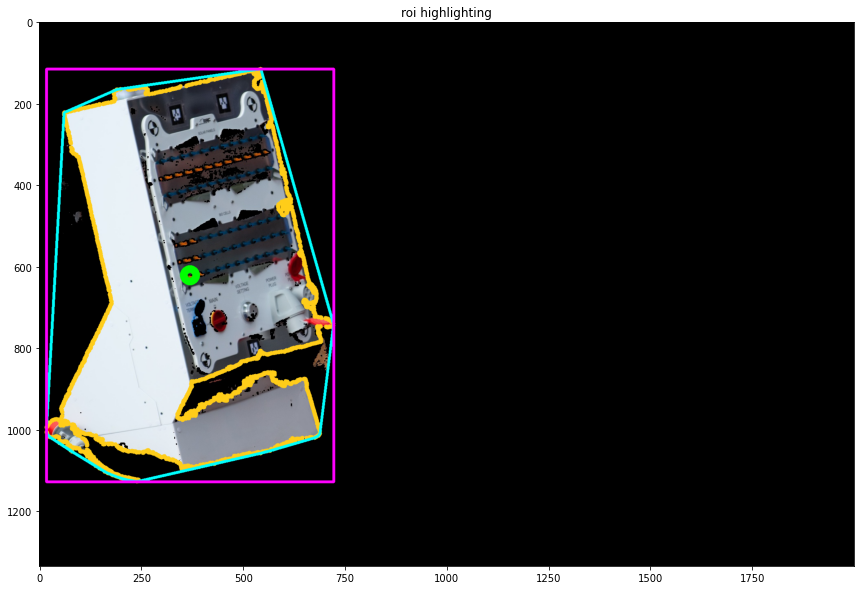

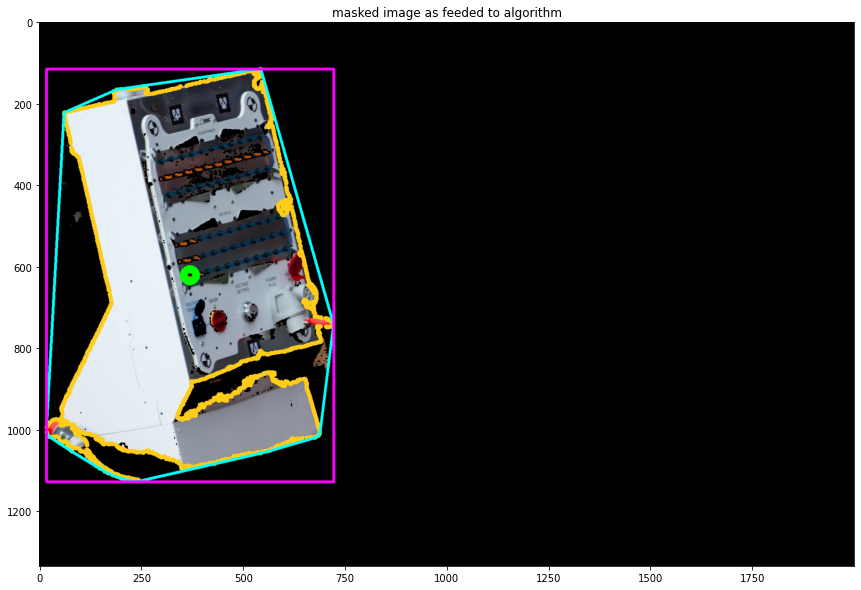

done


In [7]:
# image to find contour and roi
img2roi=cv.imread('../../images/panel/panel_real.jpg')
h,w,_=img2roi.shape
# in roi coord
co=(w//2,h//2)
# output, from video/ extracted frame
sourceimg=cv.imread('../../images/marsyard/task_newnew.jpg')
sourcecopy=sourceimg.copy()
##############################################################################################
# prefiltering
#foreground=bgForeImprov(foreground)
# grayscaling and binarization
cntsImRoi = cv.cvtColor(img2roi, cv.COLOR_BGR2GRAY)
# thresholding ##IMPROV
#imgtrack = cv.threshold(bpMask,10,255,0)#, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
cntsImRoi[cntsImRoi<10]=0
cntsImRoi[cntsImRoi>=10]=255
# contours
cntsRoi = cv.findContours(cntsImRoi, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cntsRoi = cntsRoi[0] if len(cntsRoi) == 2 else cntsRoi[1]#_susbtituible
# closing contours (can be also image operations before extraction)
# cntsImRoi=closeCnt(cntsImRoi)
# max contour, hull(max) and hullmask(max)
maxCntRoi=max(cntsRoi, key=len)
#_maxCntRoi=max(cntsRoi, key=lambda x: cv.contourArea(x)) ##alternatively
hullRoi=cv.convexHull(maxCntRoi)
hullMask=cv.fillConvexPoly(np.zeros((img2roi.shape[0],img2roi.shape[1]),np.uint8),hullRoi,255)

# FOREGROUND

# masked foreground image
img2roi=cv.bitwise_and(img2roi,img2roi,mask=hullMask)
########################################################################################

# image with roi highlight and center
forehud,rco,(wr,hr)=roiHud(img2roi,maxCntRoi,hullRoi)

# ROI center in foreground coordinates
rcox,rcoy=rco
# upperleftmost point of roi
rx,ry=rcox-wr//2,rcoy-hr//2
# roi dimensions
# wr, hr
##dimensions to construct the fake background

# toggles clean input without hud
freshInput=0
if freshInput:
    forehud=sourcecopy
    #cv.circle(forehud, (rco), 15, (0,255,0), 14)
    
# displaying
if 1:  
    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(forehud,cv.COLOR_BGR2RGB))
    plt.title('roi highlighting') if not(freshInput) else plt.title('clean input')
    plt.show()
    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(img2roi,cv.COLOR_BGR2RGB))
    plt.title('masked image as feeded to algorithm')
    plt.show()

print('done')



In [2]:
# image to find contour and roi
##result of previous code coventiently modified as if robot not present
foreground=cv.imread('../../images/panel/panel_real.jpg')
h,w,_=foreground.shape
##center for alignment pourposes, in foreground coord
##use not extended images, they'll be casted in extended image
co=(w//2,h//2)

# image to print, POV camera video stream simulation
sourceimg=cv.imread('../../images/marsyard/task_newnew.jpg')
##sourceimg could be a frame extracted from the video stream
sourcecopy=sourceimg.copy()

#foreground=bgForeImprov(foreground)

# foreground grayscaling and binarization
imgcnts = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
#imgtrack = cv.threshold(bpMask,10,255,0)#, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
imgcnts[imgcnts<10]=0
imgcnts[imgcnts>=10]=255

#imgcnts=cv.Canny(imgcnts,120,60)
## canny's edges do not appear to improve the contour closing results

# close max contour
# imgcnts=closeCnt(imgcnts)

# contours
cnts = cv.findContours(imgcnts, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
##contours closing possible also after, test didn't work

# max contour, hull and hullmask
maxcnt=max(cnts, key=len)
#_maxcnt=max(cnts, key=lambda x: cv.contourArea(x)) ##alternatively
hullmax=cv.convexHull(maxcnt)
#hullMask=cv.cvtColor(cv.fillConvexPoly(np.zeros(foreground.shape,np.uint8),hullmax,255),cv.COLOR_BGR2GRAY)
hullMask=cv.fillConvexPoly(np.zeros((h,w),np.uint8),hullmax,255)

# FOREGROUND

# masked foreground image
foreground=cv.bitwise_and(foreground,foreground,mask=hullMask)

# image with roi highlight and center
forehud,rco,(wr,hr)=roiHud(sourceimg,maxcnt,hullmax)
##paneltask_real: rco=(370, 621), hr=1013, wr=705
##     paneltask: rco=(388, 609), hr=995 , wr=671

# ROI center in foreground coordinates
rcox,rcoy=rco
# upperleftmost point of roi
rx,ry=rcox-wr//2,rcoy-hr//2
# roi dimensions
# wr, hr
##dimensions to construct the fake background

# toggles clean input without hud
freshInput=0
if freshInput:
    forehud=sourcecopy
    #cv.circle(forehud, (rco), 15, (0,255,0), 14)
    
# displaying
if 0:  
    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(forehud,cv.COLOR_BGR2RGB))
    plt.title('roi highlighting') if not(freshInput) else plt.title('clean input')
    plt.show()
    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(foreground,cv.COLOR_BGR2RGB))
    plt.title('masked image as feeded to algorithm')
    plt.show()

print('done')



done


In [3]:

# MOTION PARAMETERS
# robot traverse action (simulation by moving the image, macrostep)
motx=motx0=70
moty=moty0=0
# traverse action divided in steps €[1,motx] (for graphical reasons, microstep) 
stepx=stepx0=13
stepx=motx0 if stepx0>motx0 else (1 if stepx0<1 else stepx0)
##effective motion is of motx entity, which is performed in stepx entity steps

# motion termination criterion, by roi and POV center distance
epsx=0
if epsx<0: epsz=0
# motion action dimming test array 
motestx=[]
    
# BACKGROUND 
##result of masking the camera POV, big enough to center each possible roi
## height depending on max nearess robot will approach the panel
H,W=2*h+moty0,w*2+motx0
##leave h to have video size of foreground image, but roi center won't be centered
background=np.zeros((H,W,3),np.uint8)
# center in POV coord.
CO=(W//2+1+motx0//2,H//2+moty0//2)
##incremented of 1 for graphical purposes



# IMAGE CENTERS GEOMETRY
# rcC= rcO-CO=rco+oO-CO
## rcC: POV center-ROI center; to minimize
## rcO: roi center in POV coord.
## CO: background center in POV coord.
## oO: foreground origin in POV coord.

# starting position of foreground in POV camera

oO=(oOx,oOy)=(oOx0,oOy0)=(0,CO[1]-rcoy)
##oO0y s.t. aligns vertically POV and ROI center, supposing similar vertical aligning system as well
##oO0x arbitrary
#_add random position with test on possible casting foreground image in background shape

##addiotional geometries
# rcO=roO+rcro
## roO: roi origin in POV coord.
## rcro: roi center in ROI coord.== (wr/2,hr/2); const
# roO=roo+oO
## roo: roi origin in FOREGROUND coord.; const
    


    
# FRAME EXTENSION
# extends the output height of this many pixel wrt roih
exthr=100
if exthr<0: exthr= 0
# ROi in extended coord
roicx,roicy=rcox,rcoy+exthr//2
roih,roiw=hr,wr
roix,roiy=roicx-roiw//2,exthr//2

# extended hull mask
extHullMask=np.zeros((H,W),np.uint8)
extHullMask[oOy0:oOy0+h,oOx0:oOx0+w]=hullMask
extHullMask=extHullMask[CO[1]-hr//2-exthr//2:CO[1]+hr//2+exthr//2,:]

extforeground=np.zeros((H,W,3),np.uint8)
extforeground[oOy0:oOy0+h,oOx0:oOx0+w]=cv.imread('../../images/marsyard/task_newnew.jpg')
extforeground=extforeground[CO[1]-hr//2-exthr//2:CO[1]+hr//2+exthr//2,:]

# apply extended hullMask
if 0:
    extforeground=cv.bitwise_and(extforeground,extforeground,mask=extHullMask)
# write result
if 0:
    cv.imwrite('../../images/panel/extended/',extforeground)

#############
print('done')


done


# FOREGROUND TRACKING

## by histogram matching & mean/camshift

1. get roi center and shape by relative function
    1. here is simulated and adapted in the new extended coord by means of crafted video
    2. also here bigger ad smaller roi available
2. roi histogram
3. backprojection on new frame
4. shift algoritm to estimate window movement

#### issues:

tracking windows appears to be shifted (especially down) wrt initial one (testd as correct after a testRoi); this could be relative to histogram itself

#### improvements:

to avoid considering the black pixels, present in the area where the histogram is analyzed, add a mask to the calcHist, considering that black[hsv] s.t. value==0

https://stackoverflow.com/questions/62875780/how-to-calculate-histogram-on-opencv-without-taking-into-consideration-all-black

https://stackoverflow.com/questions/36689915/opencv-ignoring-pixels-when-generating-a-hue-histogram

In [22]:
## ignores (deprecation)warning rised by elementwise comparison @ histMask initialization
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# video loading
videosrc='../../images/video/task_ext.avi'
trackcap = cv.VideoCapture(videosrc)
# setup initial location of window
if trackcap.isOpened():
    capret, capframe = trackcap.read()
else: trackcap.release()

#-# OPTIMAL result: only H channel and smaller window, roiSmall

# roi upper left vertex and size
roix,roiy=rcox-wr//2,exthr//2
roih,roiw=hr,wr
# tracking window
roiWin=(roix,roiy,roiw,roih)

# smaller roi
sroix,sroiy=roix+roiw//4,roiy+roih//4
sroih,sroiw=roih//2,roiw//2
sroiWin=(sroix,sroiy,sroiw,sroih)

# toggles drawing of rectangles to dispay correct area of roi
testRoi=0
if testRoi:
    cv.rectangle(capframe,(sroix,sroiy),(sroix+sroiw,sroiy+sroih),(255,255,0),3)
    cv.rectangle(capframe,(roix,roiy),(roix+roiw,roiy+roih),(255,255,0),3)
    plt.figure(figsize=(20,10));plt.imshow(capframe);plt.show()
    
# for fast switching between them
winLib=(roiWin,sroiWin)
win_select=winLib[0]

# ROI for tracking and histograms
# as extracted from the video
roiVidh=cv.cvtColor(capframe[roiy:roiy+roih,roix:roix+roiw],cv.COLOR_BGR2HSV)
roiSmallh=cv.cvtColor(capframe[sroiy:sroiy+sroih,sroix:sroix+sroiw],cv.COLOR_BGR2HSV)
# as taken from masking result, in foreground coord
roiMaskedh=cv.cvtColor(foreground[rcoy-hr//2:rcoy+hr//2,rcox-wr//2:rcox+wr//2].copy(),cv.COLOR_BGR2HSV)

roiLib=(roiVidh,roiSmallh,roiMaskedh)
## roi masked currently non working for presence of black pixels
roi_select=roiLib[1]

# HISTOGRAM
# toggles use of only Hue channel    
HchanOnly=1
h_bins = 180
s_bins = 256
histSize = [h_bins] if HchanOnly else [h_bins, s_bins]
h_ranges = [0, 180]
ranges = h_ranges
if not HchanOnly:s_ranges = [0, 256]; ranges+=s_ranges
channels = [0] if HchanOnly else [0, 1]

histMask=None  if roi_select!=roiMaskedh else None
#_subs last None with mask for black pixels
histroi=cv.calcHist([roi_select],channels,histMask,histSize,ranges)
cv.normalize(histroi,histroi,0,255,cv.NORM_MINMAX)
#_add mask for black pixels s.t roihsv[roihsv.val>0]

##histMasked=cv.calcHist([roiMaskedh],[0,1],None,[180,256],[0,180,0,256]) 
##equivalent to:
#histroieq1=cv.calcHist([cv.cvtColor(extforeground,cv.COLOR_BGR2HSV)],[0,1],extHullMask,[179,255],[1,180,1,256])
#histroieq2=cv.calcHist([cv.cvtColor(foreground,cv.COLOR_BGR2HSV)],[0,1],hullMask,[179,255],[1,180,1,256])


# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )

# toggles use of meanshift or camshift (if 0)
doMeanShift=1
while(1):
    capret, capframe = trackcap.read()
    
    if capret == True:
        caph = cv.cvtColor(capframe, cv.COLOR_BGR2HSV)
        
        capdest = cv.calcBackProject([caph],channels,histroi,ranges,1)
        
        if doMeanShift:
            # apply meanshift to get the new location
            capret, win_select = cv.meanShift(capdest, win_select, term_crit)
            # Draw it on image
            xtr,ytr,wtr,htr = win_select
            trackres = cv.rectangle(capframe, (xtr,ytr),(xtr+wtr,ytr+htr), (0,255,0),10)
            cv.circle(trackres,(xtr+wtr//2,ytr+htr//2),10,255,-1)
        else:
            # apply camshift to get the new location
            capret, win_select = cv.CamShift(dcapest, win_select, term_crit)
            # Draw it on image
            cappts = np.int0(cv.boxPoints(capret))
            trackres = cv.polylines(capframe,[cappts],True, (0,255,0),10)
        cv.imshow('tracking result',trackres)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cv.destroyAllWindows()
   
print('done')

KeyboardInterrupt: 

## tracking by feature maching

this can be intended as a less ready-to-go solution for the tracking problem

once roi is found by means of contours left after background remotion, 
1. take a region contained in it which certeaintly present some peculiar feature of the panel, e.g a rectangle around roi center with same proportion as roi's rectangle
2. extract features inside that area
3. extract features from the new video frame
4. match features of new frame with roi ones
5. reconstruct the area that contains that features and define a new roi center

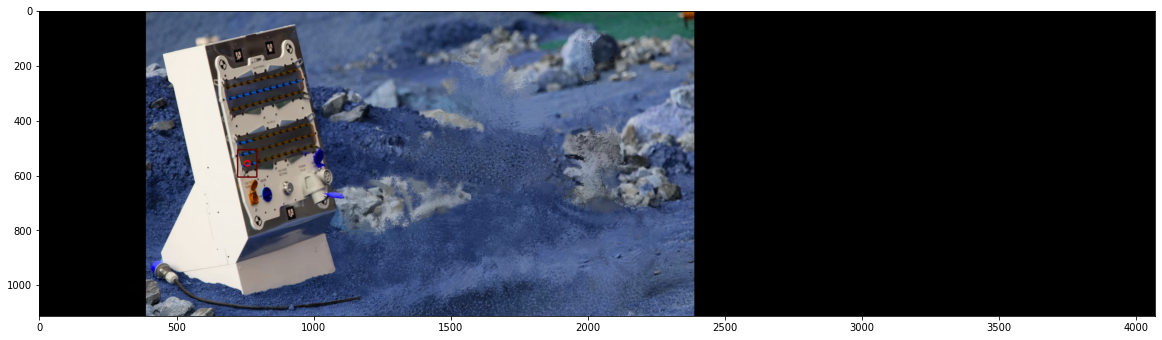

done


In [6]:
# toggles extraction of frame at greater video time
extractFuture=1

# toggles mask extraction
extractMask=0

# toggles greyscaling
convGray=0

# video loading
videosrc='../../images/video/task_ext.avi'
trackcap = cv.VideoCapture(videosrc)

# frame extraction
if trackcap.isOpened():
    capret, capframe = trackcap.read()
    # also extracts frame at greater(future) time from video
    if extractFuture:
        current_framenum=trackcap.get(cv.CAP_PROP_POS_FRAMES)
        frame_time=2000## ms
        # checks if choosen time < video lenght
        if frame_time<=trackcap.get(7)*trackcap.get(5):
            trackcap.set(0, frame_time-1)
            futret,futframe=trackcap.read()
            # resetting video at frame following capframe
            trackcap.set(1,current_framenum)
        else:raise SystemExit("choosen time exceeds video lenght!")
#         plt.figure(figsize=(20,10));plt.imshow(futframe);plt.show()
else: trackcap.release()
cap2frame=capframe.copy

# roi as extracted from video (== roi in extended coord)
# roiframe=capframe[roiy:roiy+roih,roix:roix+roiw]
roiframe=capframe
   
# frame shape   
frameH,frameW,_=capframe.shape
## constant for all video frames

# query extraction
qcx,qcy=rcox,(exthr+hr)//2
# smaller, concentric version of roi
reduxFactor=10
qh,qw=hr//reduxFactor,wr//reduxFactor
qx,qy=qcx-qw//2,qcy-qh//2

showQuery=0## debug
if showQuery:
    cv.rectangle(capframe,(qx,qy),(qx+qw,qy+qh),(255,255,0),3)
    cv.circle(capframe,(qcx,qcy),min(qh//2,qw//2),(255,255,0),3)
    plt.figure(figsize=(20,10));plt.imshow(capframe);plt.show()
    
# choosen query
qframe=capframe[qy:qy+qh,qx:qx+qw]

# masks
if extractMask:
    ## rectangular
    recMask=cv.rectangle(np.zeros((frameH,frameW),np.uint8),\
                (qx,qy),(qx+qw,qy+qh),255,-1)
    ## circular
    cirMask=cv.circle(np.zeros((frameH,frameW),np.uint8),\
                      (qcx,qcy),min(qh//2,qw//2),(255,255,0),-1)

    recframe=cv.bitwise_and(capframe,capframe,mask=recMask)
    cirframe=cv.bitwise_and(capframe,capframe,mask=cirMask)
    
    if 0:## debug
        plt.figure(figsize=(20,10));plt.imshow(recframe);plt.show()
        plt.figure(figsize=(20,10));plt.imshow(cirframe);plt.show()

# random ground region
##test of correct non matching
extractRandom=0
if extractRandom:
    randframe=capframe[500:500+qh,1200:1200+qw]

# QUERY AND TARGET SELECTION #########################################################
query_img=recframe if extractMask else qframe
target_img=futframe if extractFuture else roiframe

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# gray conversion
query_imgg=cv.cvtColor(query_img,cv.COLOR_BGR2GRAY) if convGray else query_img
target_imgg=cv.cvtColor(target_img,cv.COLOR_BGR2GRAY) if convGray else target_img
##is greyscaling really necessary?

# find the keypoints and descriptors with SIFT

query_kp=sift.detect(query_imgg)
target_kp = sift.detect(target_imgg)

showKp=0
if showKp:
    target_img2=cv.drawKeypoints(target_imgg,target_kp,None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    query_img2=cv.drawKeypoints(query_imgg,query_kp,None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(20,10));plt.imshow(target_img2);plt.show()
    plt.figure(figsize=(20,10));plt.imshow(target_img2);plt.show()
    del query_img2,target_img2
    
# Describing keypoints for query and train images
target_kp,target_desc = sift.compute(target_imgg,target_kp)##train
query_kp, query_desc=sift.compute(query_imgg,query_kp)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(query_desc,target_desc,k=2)
good_matches = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good_matches.append(m)

# Checking if we found enough matching
MIN_MATCH_COUNT = 10
if len(good_matches)>MIN_MATCH_COUNT:
    # building the corrspondences arrays of good matches
    corSrc_pts = np.float32([ query_kp[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
    corDst_pts = np.float32([ target_kp[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
    # Using RANSAC to estimate a robust homography. 
    # It returns the homography M and a mask for the discarded points
    matcHom, maskTrash = cv.findHomography(corSrc_pts, corDst_pts, cv.RANSAC, 5.0)
    
    # Mask of discarded point used in visualization
    matchesMask = maskTrash.ravel().tolist()
    
    # Corners of the query image
    (hquery,wquery,_) =  query_imgg.shape
    matchPts = np.float32([ [0,0],[0,hquery-1],[wquery-1,hquery-1],[wquery-1,0] ]).reshape(-1,1,2)
    # Projecting the corners into the train image
    destPts = np.int32(cv.perspectiveTransform(matchPts,matcHom))
    # new roi frame
    # new roi center
    (destcenx,destceny)=destcen=((destPts[0]+destPts[2])//2).reshape(2,1,1)[0],\
                                ((destPts[0]+destPts[2])//2).reshape(2,1,1)[1]
    cv.rectangle(target_img,(destcenx-wquery//2,destceny-hquery//2),\
                (destcenx+wquery//2,destceny+hquery//2),100,3)
    ##alternatively:
#     roiframe = cv.polylines(target_img,[destPts],True,255,3, cv.LINE_AA)
    
    cv.circle(target_img,destcen,10,255,3)
    
    
else:
    print( "Not enough matches are found - {}/{}".format(len(good_matches), MIN_MATCH_COUNT) )
    matchesMask = None

plt.figure(figsize=(20,10));plt.imshow(target_img);plt.show();

##############
print('done')

### feature tracking on continuous video

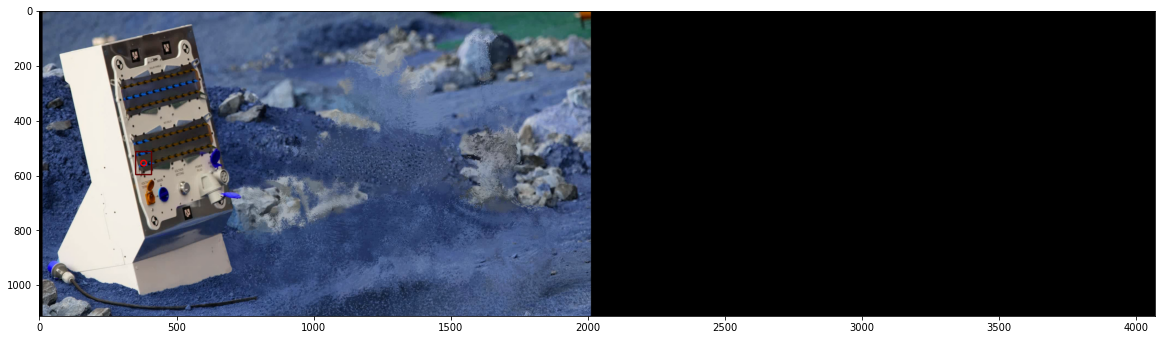

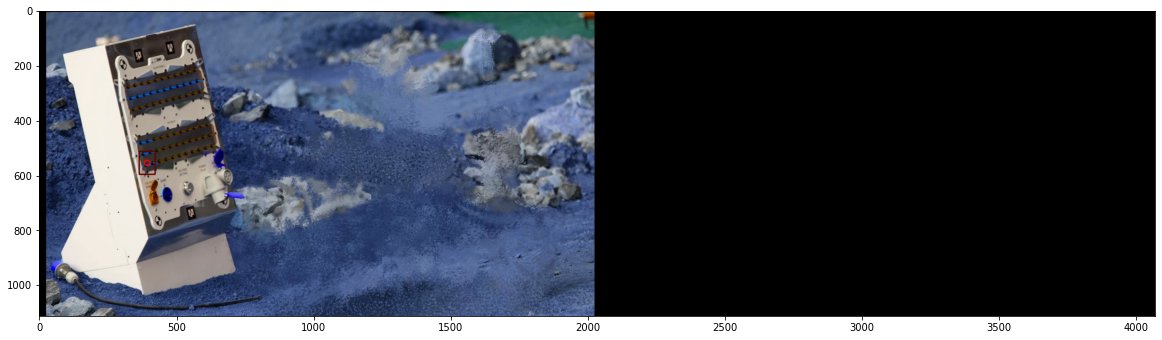

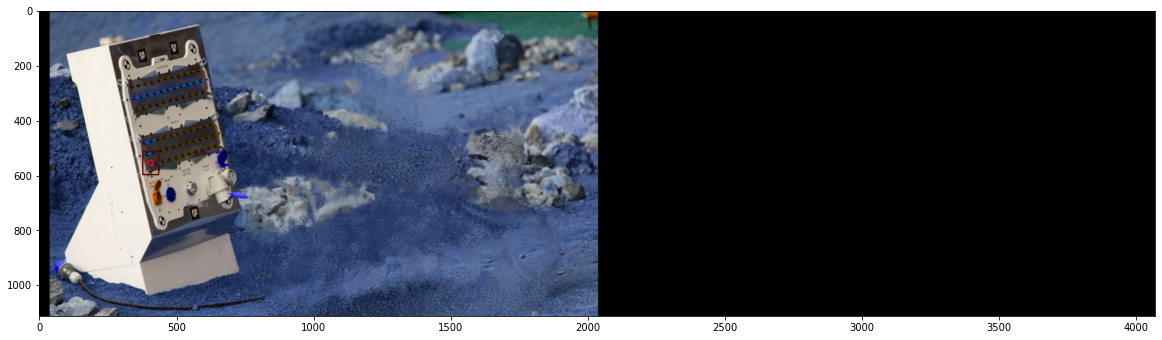

Not enough matches are found - 6/6


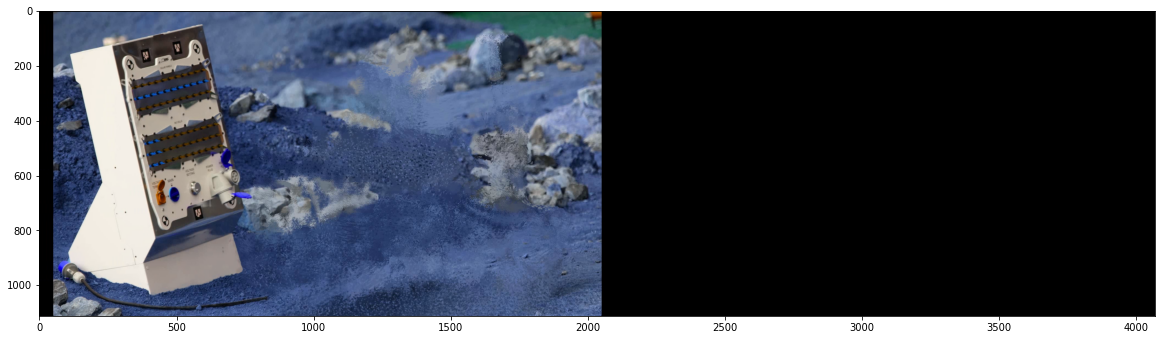

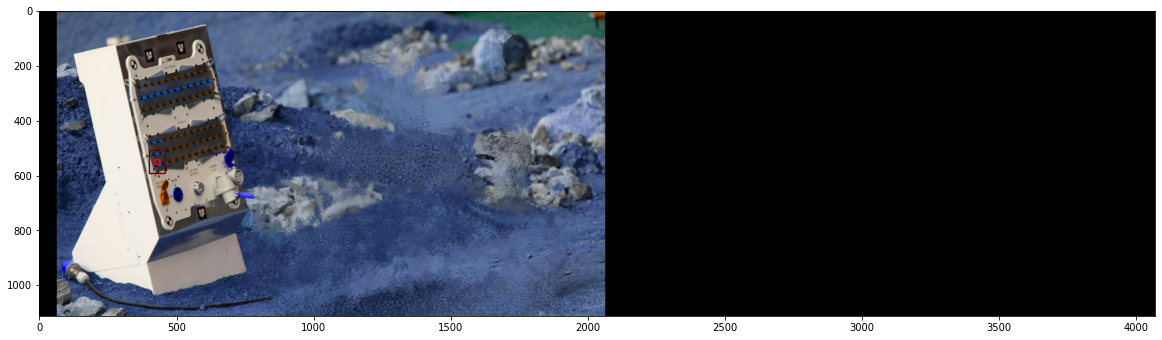

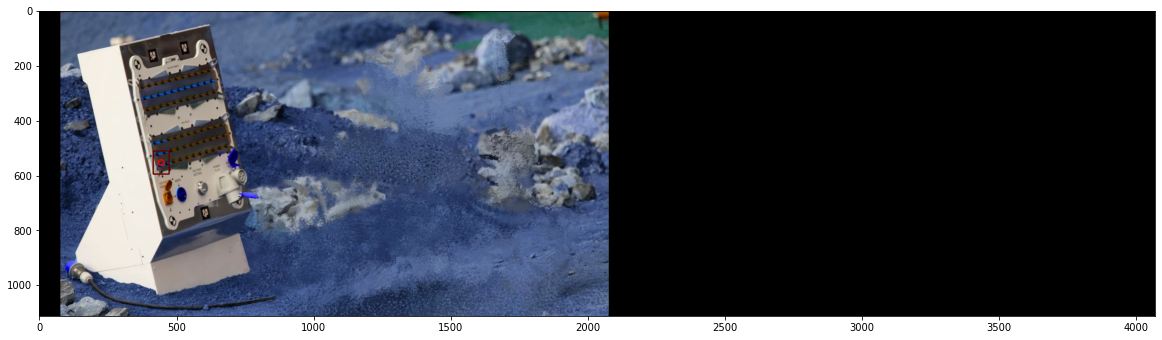

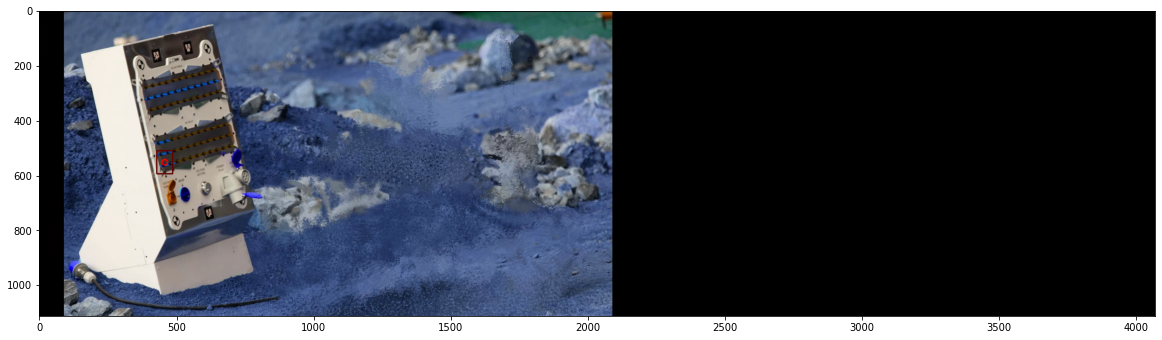

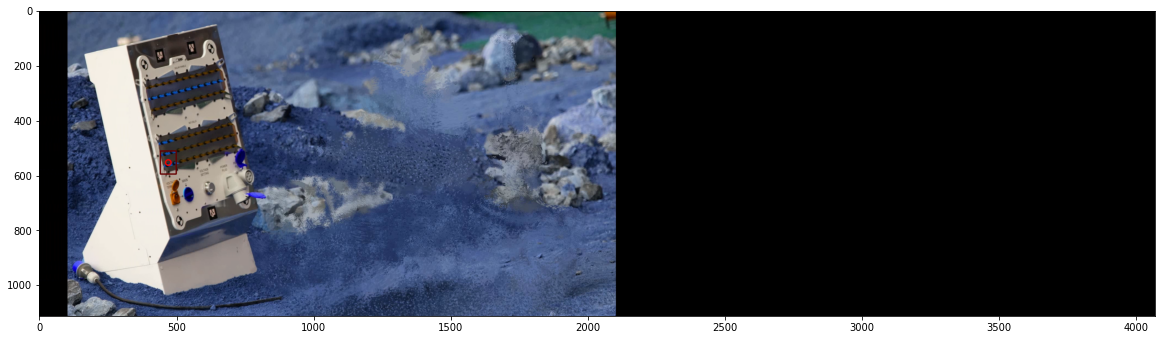

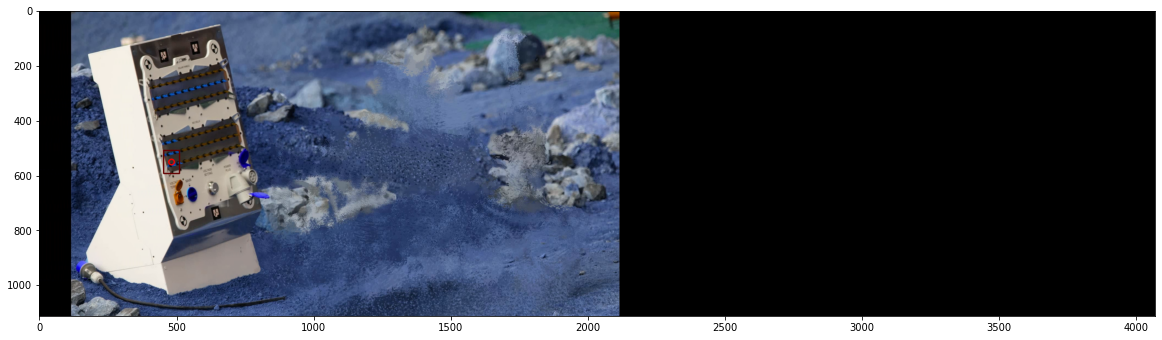

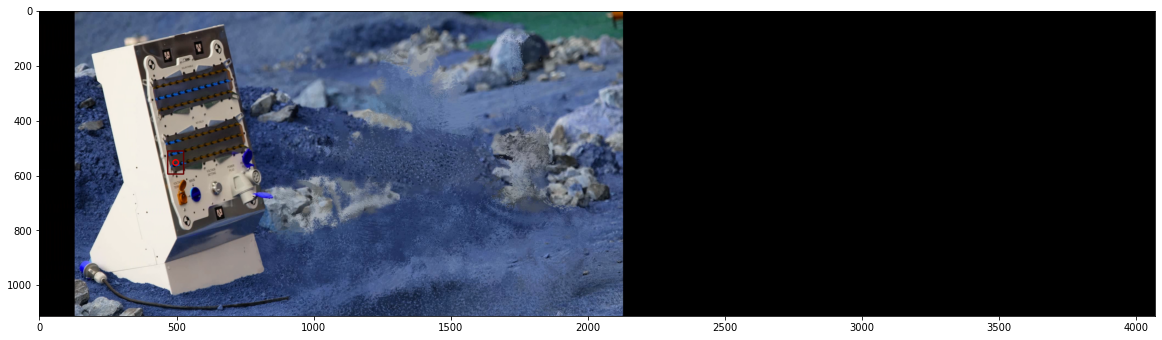

KeyboardInterrupt: 

In [12]:
# sift initialization
sift = cv.xfeatures2d.SIFT_create()
# flann initialization
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
MIN_MATCH_COUNT = 6

videosrc='../../images/video/task_ext.avi'
trackcap = cv.VideoCapture(videosrc)

# first frame
if trackcap.isOpened():
    capret, capframe = trackcap.read()
    frameH,frameW,_=capframe.shape
else: trackcap.release()
#_will be subs with the masked image used for roi    

# greyscaling
convGray=1

##### ROI
# extended roi center
qcx,qcy=rcox,(exthr+hr)//2

# query region for feature tracking, concentric with roi
reduxFactor=12
qh,qw=hr//reduxFactor,wr//reduxFactor
qx,qy=qcx-qw//2,qcy-qh//2## upperleftmost corner
# choosen query
qframe=capframe[qy:qy+qh,qx:qx+qw]

if 0:## debug
    capframe2=capframe.copy()
    cv.rectangle(capframe2,(qx,qy),(qx+qw,qy+qh),(255,255,0),3)
    cv.circle(capframe2,(qcx,qcy),min(qh//2,qw//2),(255,255,0),3)
    plt.figure(figsize=(20,10));plt.imshow(capframe2);plt.show()
    
query_img=qframe
query_imgg=cv.cvtColor(query_img,cv.COLOR_BGR2GRAY) if convGray else query_img
query_kp=sift.detect(query_imgg) 
query_kp, query_desc=sift.compute(query_imgg,query_kp)

while(1):
    capret, capframe = trackcap.read()
    
    if capret == True:
        
        target_img=capframe
        target_imgg=cv.cvtColor(target_img,cv.COLOR_BGR2GRAY) if convGray else target_img
        target_kp = sift.detect(target_imgg)
        target_kp,target_desc = sift.compute(target_imgg,target_kp)

        matches = flann.knnMatch(query_desc,target_desc,k=2)
        good_matches = []
        for m,n in matches:
            if m.distance < 0.7*n.distance:
                good_matches.append(m)


        if len(good_matches)>MIN_MATCH_COUNT:
            corSrc_pts = np.float32([ query_kp[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
            corDst_pts = np.float32([ target_kp[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
            matcHom, maskTrash = cv.findHomography(corSrc_pts, corDst_pts, cv.RANSAC, 5.0)
            matchesMask = maskTrash.ravel().tolist()
            matchPts = np.float32([ [0,0],[0,qh-1],[qw-1,qh-1],[qw-1,0] ]).reshape(-1,1,2)
            destPts = np.int32(cv.perspectiveTransform(matchPts,matcHom))

            (destcenx,destceny)=destcen=((destPts[0]+destPts[2])//2).reshape(2,1,1)[0],\
                                        ((destPts[0]+destPts[2])//2).reshape(2,1,1)[1]
            cv.rectangle(target_img,(destcenx-qw//2,destceny-qh//2),\
                        (destcenx+qw//2,destceny+qh//2),100,3)
            ##alternatively:
        #     roiframe = cv.polylines(target_img,[destPts],True,255,3, cv.LINE_AA)

            cv.circle(target_img,destcen,10,255,3)
        else:
            print( "Not enough matches are found - {}/{}".format(len(good_matches), MIN_MATCH_COUNT) )
            matchesMask = None

        plt.figure(figsize=(20,10));plt.imshow(target_img);plt.show();

#         cv.imshow('tracking result',trackres)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
# cv.destroyAllWindows()

##############
print('done')